## Week 2 Assignment: Public Schools Data

For this week's assignment I will take a look at a shapefile of all of California's public schools. This is a particularly large file, so I will attempt to filter down to active high schools rather than all schools present. 

Begin by importing the pandas and geopandas library

In [2]:
import pandas as pd
import geopandas as gpd

Read the data

In [4]:
parks = gpd.read_file('parks.zip')

print the first few rows

In [5]:
parks

,LOCATION,FORMAL_NAM,LOC_CODE,PARK_TYPE,PARK_CLASS,GIS_ACRES,DESIGNATED,FIRST_AQ_D,MASTER_PLA,MAINT_DIST,...,ZIP,LATITUDE,LONGITUDE,MARKETING_,FACILITIES,DIAGRAM,PHOTO,PARCEL_MAT,BND_QC,geometry
0,Weir Gulch South,Weir Gulch Park - South,837,Park,Linear,10.509757,Partial,1960,2010,SW,...,None,39.707758,-105.049778,PK,"Bike/Pedestrian Path, Weir Gulch Trail, Open S...",ParkArt_Weir Gulch Park South.pdf,images/parks/no_imagerec.gif,No,2009-02-18,"MULTIPOLYGON (((-105.04941 39.71116, -105.0494..."
1,Aztlan,Aztlan Park,032,Park,Neighborhood,3.688502,Yes,1974,None,NW,...,None,39.777565,-105.004748,PK,"Recreation Center, Benches, Picnic Tables, Pla...",ParkArt_Aztlan Park.pdf,images/parks/atzlanpark.jpg,Yes,2008-11-20,"POLYGON ((-105.00426 39.77697, -105.00426 39.7..."
2,Denver Botanic Gardens,Denver Botanic Gardens,356,Park,Special Use,22.751943,Partial - 1956,1890,2007,E,...,None,39.732027,-104.961492,None,"Gardens, Fountains, Paid Admission Required",None,images/parks/no_imagerec.gif,Yes,2009-09-16,"MULTIPOLYGON (((-104.96002 39.73103, -104.9600..."
3,Florida & Raritan,Sanderson Gulch - Florida & Raritan,851,Park,Linear,15.612488,Yes,1970,2010,SW,...,None,39.688897,-105.012123,None,"Bike/Pedestrian Path, Sanderson Gulch Trail, B...",ParkArt_Sanderson Gulch Open Space.pdf,images/parks/sandersongulchpark.jpg,Yes,2009-08-11,"POLYGON ((-105.01094 39.68813, -105.01097 39.6..."
4,Lowry Open Space,Lowry Open Space,L28,Open Space,Open Space,56.553398,Partial - 2014 May,2013,2000,NE,...,None,39.719276,-104.880825,PK,"Dog Park, Natural Areas, Bike/Pedestrian Path",ParkArt_Lowry Open Space.pdf,None,No,2014-03-06,"POLYGON ((-104.88457 39.72182, -104.88403 39.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Northfield Athletic Complex,Northfield Athletic Complex,584,Future,Undeveloped,48.171789,No,2019,None,NE,...,None,39.794397,-104.877778,None,Future athletic fields shared maintenance with...,None,None,Yes,2019-08-02,"POLYGON ((-104.87558 39.79690, -104.87557 39.7..."
342,Westwood Rec Center,Westwood Rec Center Grounds,843,Future,Undeveloped,2.771752,No,2019,2020,SW,...,None,39.703073,-105.043243,None,Future recreation center site,None,None,No,2020-01-15,"POLYGON ((-105.04376 39.70335, -105.04314 39.7..."
343,The Urban Farm,The Urban Farm,585,Park,Special Use,21.425295,Yes - 2016 November,2015,None,NE,...,None,39.767323,-104.872662,None,The Urban Farm,None,None,No,2020-06-02,"POLYGON ((-104.86879 39.76860, -104.86879 39.7..."
344,Arkins Promenade,Arkins Promenade,945,Park,Linear,0.858358,Not Eligible,N/A - ROW (2020),2019,NW,...,None,39.770917,-104.981205,None,Future Park Promenade,None,None,No,2020-07-29,"POLYGON ((-104.98162 39.77022, -104.98182 39.7..."


investigating how many rows and columns the shapefile has

In [6]:
parks.shape

(346, 28)

There are 346 rows and 28 columns.

Getting more information about parks

In [7]:
parks.info

<bound method DataFrame.info of                         LOCATION                           FORMAL_NAM  \
0               Weir Gulch South              Weir Gulch Park - South   
1                         Aztlan                          Aztlan Park   
2         Denver Botanic Gardens               Denver Botanic Gardens   
3              Florida & Raritan  Sanderson Gulch - Florida & Raritan   
4               Lowry Open Space                     Lowry Open Space   
..                           ...                                  ...   
341  Northfield Athletic Complex          Northfield Athletic Complex   
342          Westwood Rec Center          Westwood Rec Center Grounds   
343               The Urban Farm                       The Urban Farm   
344             Arkins Promenade                     Arkins Promenade   
345                  Arkins Park           Unnamed 34th & Arkins Park   

    LOC_CODE   PARK_TYPE    PARK_CLASS  GIS_ACRES           DESIGNATED  \
0        837     

Maybe we don't need all of these columns, lots of info for polygons, unsure how to plot these yet. 

attempting a plot

<AxesSubplot: >

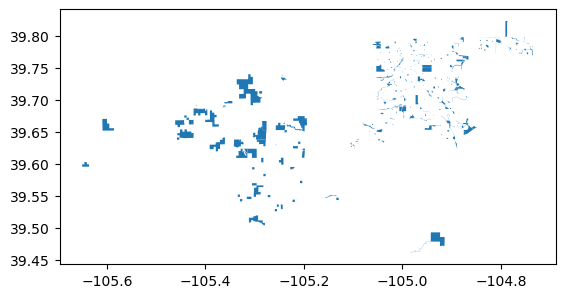

In [8]:
parks.plot()

This plotted the polygons of the parks across Denver

return counts of unique park classes

In [28]:
class_count = parks['PARK_CLASS'].value_counts()
class_count

Neighborhood         114
Linear                49
Mountain              44
Community             32
Pocket                28
Open Space            20
Special Use           12
Undeveloped           12
Regional              10
Athletic Complex      10
Recreation Center      8
Golf                   7
Name: PARK_CLASS, dtype: int64

There are 12 different classes of parks. The most common class is "neighborhood". 

return counts of unique park types

In [12]:
parks['PARK_TYPE'].value_counts()

Park                  271
Conservation Tract     27
Open Space             21
Future                 12
Grounds                 8
Golf                    7
Name: PARK_TYPE, dtype: int64

There are only 6 types of parks, including golf courses. 

trimming to desired columns

In [29]:
desired_columns = ['FORMAL_NAM','LOCATION','PARK_TYPE','PARK_CLASS','GIS_ACRES','LATITUDE','LONGITUDE', 'PHOTO']

parks_trimmed = parks[desired_columns].copy()
parks_trimmed

,FORMAL_NAM,LOCATION,PARK_TYPE,PARK_CLASS,GIS_ACRES,LATITUDE,LONGITUDE,PHOTO
0,Weir Gulch Park - South,Weir Gulch South,Park,Linear,10.509757,39.707758,-105.049778,images/parks/no_imagerec.gif
1,Aztlan Park,Aztlan,Park,Neighborhood,3.688502,39.777565,-105.004748,images/parks/atzlanpark.jpg
2,Denver Botanic Gardens,Denver Botanic Gardens,Park,Special Use,22.751943,39.732027,-104.961492,images/parks/no_imagerec.gif
3,Sanderson Gulch - Florida & Raritan,Florida & Raritan,Park,Linear,15.612488,39.688897,-105.012123,images/parks/sandersongulchpark.jpg
4,Lowry Open Space,Lowry Open Space,Open Space,Open Space,56.553398,39.719276,-104.880825,None
...,...,...,...,...,...,...,...,...
341,Northfield Athletic Complex,Northfield Athletic Complex,Future,Undeveloped,48.171789,39.794397,-104.877778,None
342,Westwood Rec Center Grounds,Westwood Rec Center,Future,Undeveloped,2.771752,39.703073,-105.043243,None
343,The Urban Farm,The Urban Farm,Park,Special Use,21.425295,39.767323,-104.872662,None
344,Arkins Promenade,Arkins Promenade,Park,Linear,0.858358,39.770917,-104.981205,None


Querying

In [26]:
parks_trimmed.query("PARK_TYPE == 'Open Space'")

,FORMAL_NAM,LOCATION,PARK_TYPE,PARK_CLASS,GIS_ACRES,LATITUDE,LONGITUDE,PHOTO
4,Lowry Open Space,Lowry Open Space,Open Space,Open Space,56.553398,39.719276,-104.880825,None
13,Kelly Open Space,Kelly Open Space,Open Space,Open Space,59.531374,39.729766,-104.890552,images/parks/no_imagerec.gif
24,Hutchinson (Theodore A) Park,Hutchinson,Open Space,Open Space,16.302940,39.658420,-104.903844,images/parks/hutchinsonpark.jpg
29,Prairie Uplands Park,Prairie Uplands,Open Space,Open Space,44.482385,39.765483,-104.872873,images/parks/westerlycreekpark.jpg
66,DEN Open Space,DEN Open Space,Open Space,Open Space,198.210087,39.811259,-104.789200,None
115,Northfield Pond Park,Northfield Pond,Open Space,Open Space,33.571610,39.782485,-104.897791,images/parks/northfieldpondpark.jpg
138,Lower Lakewood Gulch,Lower Lakewood Gulch,Open Space,Open Space,6.618537,39.738571,-105.020193,None
149,Hentzell (Paul A) Park,Hentzell,Open Space,Open Space,59.249637,39.663321,-104.871175,images/parks/hentzellpark.jpg
158,Lowry Dam,Lowry Dam,Open Space,Open Space,46.147397,39.715855,-104.883626,None
207,Lake of Lakes Park,Lake of Lakes,Open Space,Open Space,5.613943,39.638046,-105.090069,images/parks/no_imagerec.gif


Attempting a map

In [17]:
import folium 
m = folium.Map()
m

Centering the map

In [19]:
latitude = parks_trimmed.LATITUDE.mean()
latitude

39.598790861242776

In [20]:
longitude = parks_trimmed.LONGITUDE.mean()
longitude

-104.69337376760116

Mapping

In [30]:
m = folium.Map(location=[latitude,longitude])
m

The map is now centered over Denver. 

Adding markers

In [23]:
for index, row in parks_trimmed.iterrows():
    print(row.LOCATION, row.LATITUDE, row.LONGITUDE)

Weir Gulch South 39.70775766 -105.04977835
Aztlan 39.77756472 -105.00474827
Denver Botanic Gardens 39.73202721 -104.96149188
Florida & Raritan 39.68889697 -105.01212295
Lowry Open Space 39.71927563 -104.88082526
Montclair Rec Center 39.72742602 -104.89508112
Parkfield 39.79181259 -104.80506474
Skyline 39.74856258 -104.99521204
Wagon Trail 39.62924014 -105.10148814
Swansea 39.78554954 -104.95557185
Highline Canal (Parker to Havana) 39.70188346 -104.88489927
Milstein 39.72328931 -105.01313861
Highline Canal (Colorado to Parker) 39.66592587 -104.91112923
Kelly Open Space 39.72976602 -104.8905515
Hampden Heights West 39.65775007 -104.88793324
Creekfront 39.7464265 -105.00018199
Crescent 39.72924484 -104.89857614
Elmendorf 39.79256388 -104.84142359
Garland South Greenbelt 39.69037509 -104.91051647
SW Rec Center 39.62899527 -105.09935606
City of Potenza 39.69600699 -104.92362203
Ash Grove 39.68527668 -104.92411106
Congress 39.73009892 -104.95708382
Loretto Heights 39.66386211 -105.03277884
H

In [24]:
for index, row in parks_trimmed.iterrows():
    # add folium marker code
    folium.Marker([row.LATITUDE, row.LONGITUDE], popup=row.LOCATION, tooltip=row.LOCATION).add_to(m)
m

Going to attempt to color code by park type. 

In [35]:
parks_trimmed.loc[parks_trimmed['PARK_TYPE'] == 'Park', 'color'] = 'green'
parks_trimmed.loc[parks_trimmed['PARK_TYPE'] == 'Conservation Tract', 'color'] = 'darkblue'
parks_trimmed.loc[parks_trimmed['PARK_TYPE'] == 'Open Space', 'color'] = 'purple'
parks_trimmed.loc[parks_trimmed['PARK_TYPE'] == 'Future', 'color'] = 'white'
parks_trimmed.loc[parks_trimmed['PARK_TYPE'] == 'Grounds', 'color'] = 'beige'
parks_trimmed.loc[parks_trimmed['PARK_TYPE'] == 'Golf', 'color'] = 'red'

This created a new column color coding each park type. Now, reset the map. 

In [36]:
m = folium.Map(location=[latitude,longitude], tiles='Stamen Terrain', zoom_start=10)

Add the stations with color coding back to the map. 

In [37]:
for index, row in parks_trimmed.iterrows():
    tooltip_text = row.LOCATION + ' Location: ' + row.LOCATION
    folium.Marker(
        [row.LATITUDE,row.LONGITUDE], 
        popup=row.LOCATION, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)

# show the map
m

Now we can differentiate open space from parks from golf courses etc. 

Saving the map as html

In [38]:
m.save('parks.html')